# Multiple Linear Regression

<hr>

## Importing packages and reading the data ##

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("../datasets/MLR_advertising_budget.csv")

## Explore the data

In [3]:
df.head(5)

,TV Ad Budget,Radio Ad Budget,Newspaper Ad Budget,Advertising Budget total,Sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TV Ad Budget              200 non-null    float64
 1   Radio Ad Budget           200 non-null    float64
 2   Newspaper Ad Budget       200 non-null    float64
 3   Advertising Budget total  200 non-null    float64
 4   Sales                     200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [5]:
df.describe()

,TV Ad Budget,Radio Ad Budget,Newspaper Ad Budget,Advertising Budget total,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,200.860500,14.022500
std,85.854236,14.846809,21.778621,92.985181,5.217457
min,0.700000,0.000000,0.300000,11.700000,1.600000
25%,74.375000,9.975000,12.750000,123.550000,10.375000
50%,149.750000,22.900000,25.750000,207.350000,12.900000
75%,218.825000,36.525000,45.100000,281.125000,17.400000
max,296.400000,49.600000,114.000000,433.600000,27.000000


In [7]:
df.shape

(200, 5)

## Correlation ##
For our linear regression we need to look at the strength of the relationships between variables.

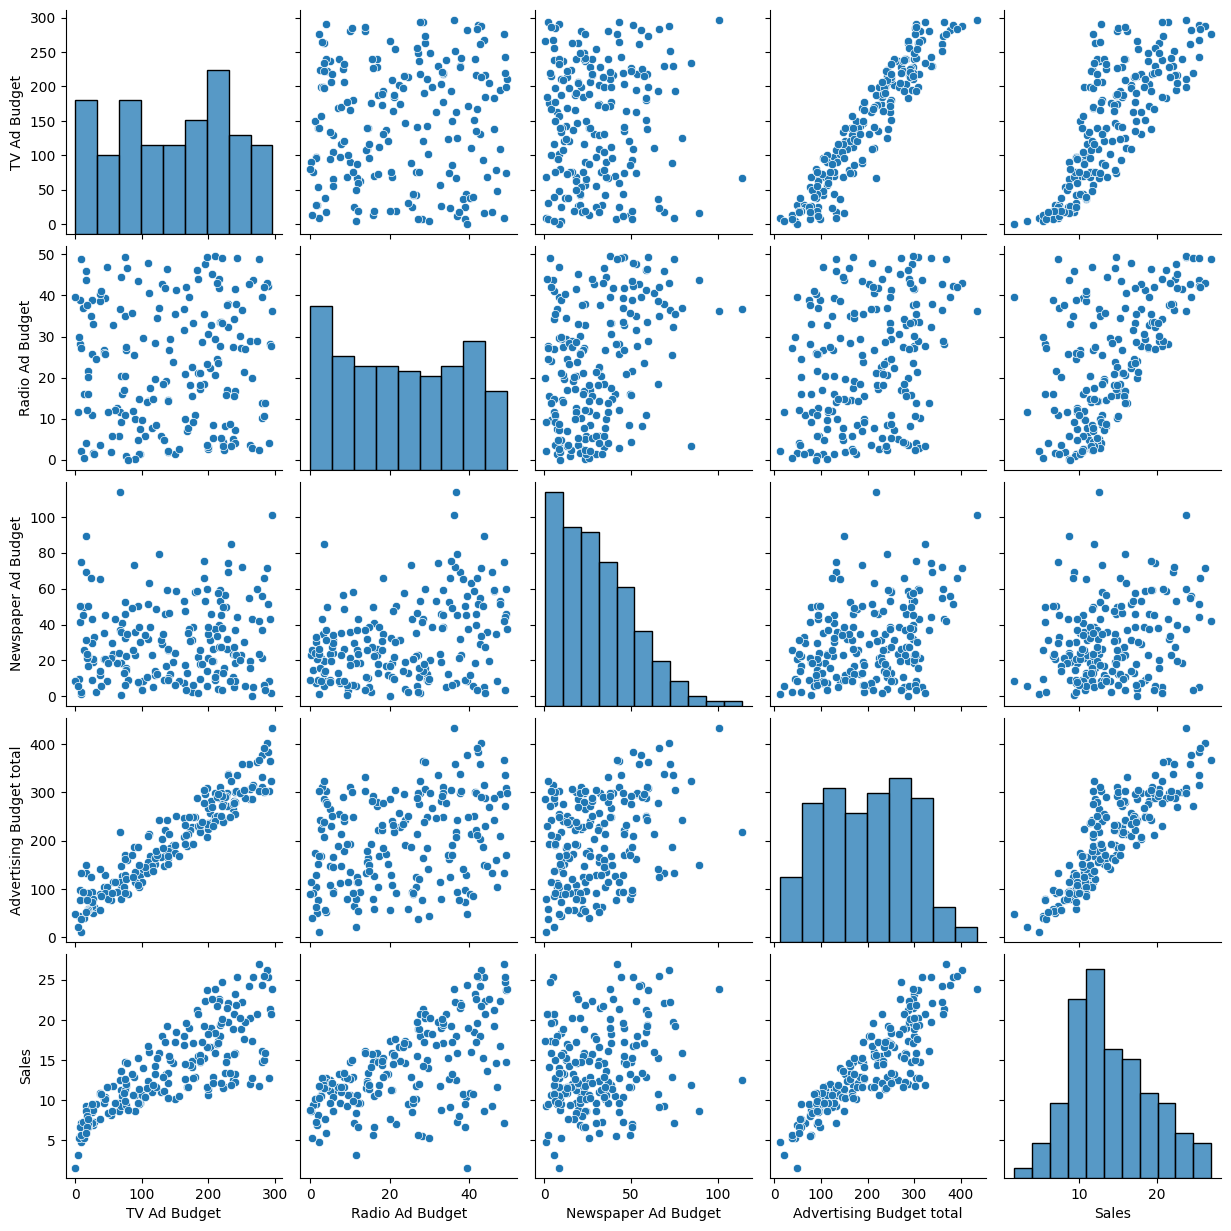

In [8]:
sns.pairplot(df)


In [9]:
df.corr()

,TV Ad Budget,Radio Ad Budget,Newspaper Ad Budget,Advertising Budget total,Sales
TV Ad Budget,1.000000,0.054809,0.056648,0.945330,0.782224
Radio Ad Budget,0.054809,1.000000,0.354104,0.293211,0.576223
Newspaper Ad Budget,0.056648,0.354104,1.000000,0.343059,0.228299
Advertising Budget total,0.945330,0.293211,0.343059,1.000000,0.867712
Sales,0.782224,0.576223,0.228299,0.867712,1.000000


Sometimes a correlation matrix with several variables can be hard to read. In this case it helps, if we **filter** our data as we only want to look at the stronger correlationships.

In [10]:
# filter the correlation matrix to show only (absolute) values above 0.4
corr_matrix = df.corr().abs()
filtered_matrix = corr_matrix[corr_matrix > 0.4]
filtered_matrix


,TV Ad Budget,Radio Ad Budget,Newspaper Ad Budget,Advertising Budget total,Sales
TV Ad Budget,1.000000,NaN,NaN,0.945330,0.782224
Radio Ad Budget,NaN,1.000000,NaN,NaN,0.576223
Newspaper Ad Budget,NaN,NaN,1.0,NaN,NaN
Advertising Budget total,0.945330,NaN,NaN,1.000000,0.867712
Sales,0.782224,0.576223,NaN,0.867712,1.000000


In [11]:
df.columns

Index(['TV Ad Budget', 'Radio Ad Budget', 'Newspaper Ad Budget',
       'Advertising Budget total', 'Sales'],
      dtype='object')

Text(0, 0.5, 'Sales')

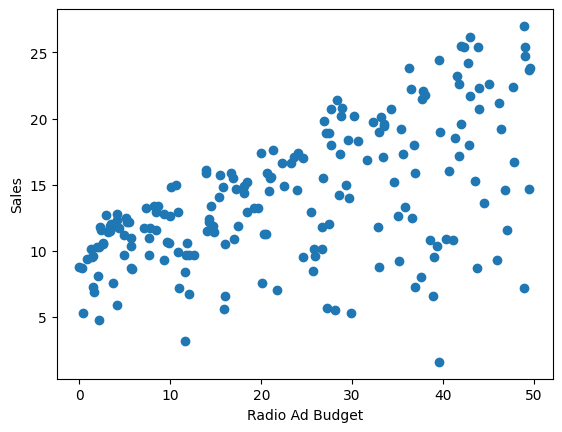

In [13]:
plt.scatter(df['Radio Ad Budget'], df['Sales'])
plt.xlabel("Radio Ad Budget")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

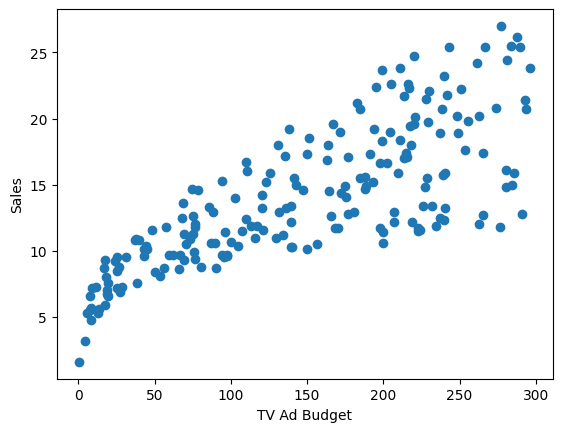

In [14]:
plt.scatter(df['TV Ad Budget'], df['Sales'])
plt.xlabel("TV Ad Budget")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

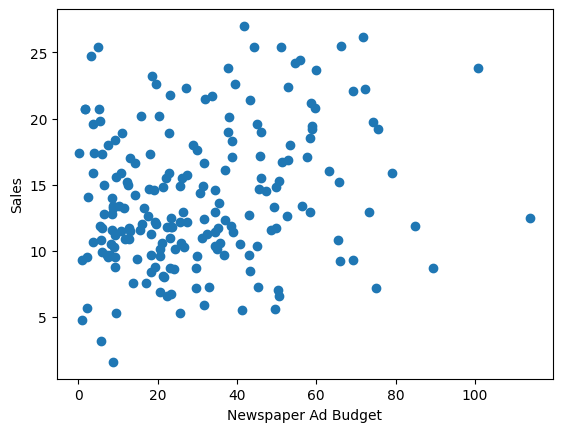

In [15]:
plt.scatter(df['Newspaper Ad Budget'], df['Sales'])
plt.xlabel("Newspaper Ad Budget")
plt.ylabel("Sales")

## Checking for Collinearity ##

In [16]:
# Measuring if therre is stong relationship between the two independetn variables- time on app and length of membership

df[['TV Ad Budget', 'Radio Ad Budget', 'Newspaper Ad Budget']].corr()

,TV Ad Budget,Radio Ad Budget,Newspaper Ad Budget
TV Ad Budget,1.000000,0.054809,0.056648
Radio Ad Budget,0.054809,1.000000,0.354104
Newspaper Ad Budget,0.056648,0.354104,1.000000


## Split the DataFrame into train and test data

In [17]:
train, test = train_test_split(
    df,
    random_state = 13 # this ensures that we get the same answer each time
)

In [18]:
train.shape

(150, 5)

In [ ]:
test.shape

(125, 5)

In [21]:
df

,TV Ad Budget,Radio Ad Budget,Newspaper Ad Budget,Advertising Budget total,Sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9
...,...,...,...,...,...
195,38.2,3.7,13.8,55.7,7.6
196,94.2,4.9,8.1,107.2,9.7
197,177.0,9.3,6.4,192.7,12.8
198,283.6,42.0,66.2,391.8,25.5


## Train the model

In [19]:
# Identify dependent and independent variables

dependent_var = train['Sales']
independent_var = train[['TV Ad Budget', 'Radio Ad Budget', 'Newspaper Ad Budget']]
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()


In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     361.1
Date:                Thu, 25 May 2023   Prob (F-statistic):           2.56e-67
Time:                        14:37:06   Log-Likelihood:                -295.90
No. Observations:                 150   AIC:                             599.8
Df Residuals:                     146   BIC:                             611.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.9395      0.394      7.464      0.000       2.161       3.718
TV Ad Budget            0.0462      0.002     27.242      0.000       0.043       0.050
Radio Ad Budget         0.1841      0.010     17.718      0.000       0.164       0.205
Newspaper Ad Budget    -0.0018      0.008     -0.237      0.813      -0.017       0.013
==============================================================================
Omnibus:                       47.653   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.309
Skew:                          -1.334   Prob(JB):                     4.10e-25
Kurtosis:                       6.293   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Equation of the LBF

As we have two independent variables, we need to use both coefficients to construct our equation of the LBF:

$$\begin{aligned}
\text{Predicted Yearly Spend } = &+ 37.6 \times \text{[Time on App]}\\
&+ 63.6 \times \text{[Length of Membership]}\\
&-179.1 \\
\end{aligned}$$

So a customer who spends an extra minute on the app will spend on average £37.6 extra. Similarly, a customer who has been a member for an extra year will spend on average £63.6 extra.

### Is the model 'a good fit'? ###
To understand if a model can be used to make a prediction we need to look at additional elements of the OLS Regression results: <br>

- **p-value**\
A p-value < 0.05 suggests that our data is statistically significant and that the values for our variable cannot be explained by mere coincidence. It helps us to identify which independent variables have a significant effect on the dependent variable. 


- **R-squared**\
R-squared tells us how closely the data fits the model between 0 (terrible fit) and 1 (perfect fit). In our case, 87.9\% is high.\
In good real world examples - you can expect to achieve closer to 30\%. \
\
30\% is usually sufficient because we are not trying to describe exactly the dependent variable (since we don’t have all the data), we just want to give an estimate as to what might happen under small changes. Despite not describing everything, the model still has practical use!

- **Adjusted R-squared**\
Adjusted R-squared is similar to the R-squared but is for models with more than 1 independent variable. 

- **F-Statistic**\
F-statistic is a test to compare two models. In this case, it is comparing our regression model to the base model (taking the mean).\
A high F value (> 1) means that the new model is better. A low F value (< 1) means that the old model is better.

- **Prob F-Statistic**\
Prob (F-Statistic) tells us how statistically significant this value is. The lower the probability, the more significant the difference between models. In our case, our regression model is MUCH better than the base model in a statistically significant way.

 
## Predict data for the test set and compare ##

In [22]:
predicted = model.predict(
    sm.add_constant(test[['TV Ad Budget', 'Radio Ad Budget', 'Newspaper Ad Budget']])
)

In [23]:
predicted

179    12.402050
155     5.254115
23     16.554513
159    12.351062
96     12.705455
198    23.658844
42     21.604447
110    14.782907
128    22.135326
97     15.311048
95     16.208496
106     6.066396
65      7.838772
33     18.895637
102    17.709975
89     16.720831
132     8.331062
79      9.676443
104    20.252751
70     17.704492
173    12.006242
129     7.825445
30     21.608058
7      12.081865
168    17.135205
124    19.358531
157    10.058235
165    14.250455
101    23.138684
78      8.676312
87     15.415775
141    18.272145
105    17.748106
10      7.018522
64     16.825285
13      8.831647
90     10.031585
15     20.655813
195     5.361228
94     10.460678
125     9.095137
68     18.953738
69     20.991550
108     3.572491
131    15.652452
111    21.063418
92     19.061434
144    10.039948
12     10.382274
93     21.124132
dtype: float64

## Is the model also 'a good fit' for our test data? ##
We can check this by looking at the R squared score for our prediction.

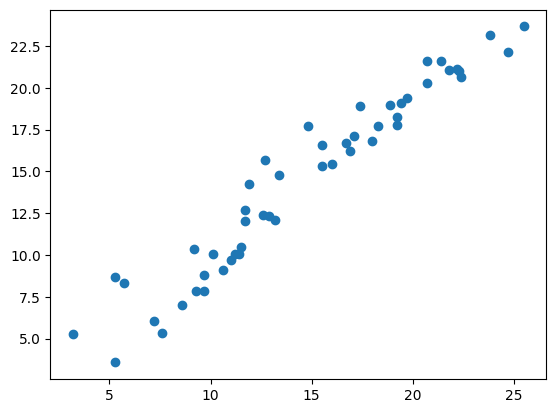

In [24]:
plt.scatter(test['Sales'], predicted)

In [25]:
# Measure the test R squared

metrics.r2_score(test['Sales'],predicted)

0.9329679186406996

# Rebuilding the model for the whole data set ##

In [26]:
dependent_var = df['Sales']
independent_var = df[['TV Ad Budget', 'Radio Ad Budget']]
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 25 May 2023   Prob (F-statistic):           4.83e-98
Time:                        14:39:24   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.9211      0.294      9.919      0.000       2.340       3.502
TV Ad Budget        0.0458      0.001     32.909      0.000       0.043       0.048
Radio Ad Budget     0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Make a prediction

In [33]:
print(df['Radio Ad Budget'].mean(),
df['TV Ad Budget'].mean(),
df['Sales'].mean())

23.264000000000006 147.0425 14.0225


In [36]:
# predict the Sales generated based on a given TV and Radio advertisement of Membership
prediction = model.predict([1, 147, 14])

print(round(float(prediction), 2))

12.28


not far off

In [29]:
df.sort_values('Sales').tail()

,TV Ad Budget,Radio Ad Budget,Newspaper Ad Budget,Advertising Budget total,Sales
98,289.7,42.3,51.2,383.2,25.4
147,243.2,49.0,44.3,336.5,25.4
198,283.6,42.0,66.2,391.8,25.5
183,287.6,43.0,71.8,402.4,26.2
175,276.9,48.9,41.8,367.6,27.0
